In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

2023-03-30 12:44:39.181627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 12:44:39.325913: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-30 12:44:39.333045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-30 12:44:39.333061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd

In [4]:
num_classes = 1
input_shape = (1, 1,3)

In [5]:
path_to_images = 'images_136044_change'

# Create an empty list to store the image data
image_data_list = []


# Loop through each file in the directory
for i in os.listdir(path_to_images):
  imagepath = path_to_images + '/' +str(i)
  images = Image.open(imagepath)
  #images.show()
  
  # Convert each image to a numpy array and append to the list
  image_data_list.append(np.array(images.resize((32,32))))

# Convert the list of image data to a numpy array
image_data = np.array(image_data_list)
print(image_data.shape)
image_data = image_data.reshape(28672,1,1,3)

# Print the shape of the numpy array
print("Shape of image_data:", image_data.shape)


(28, 32, 32, 3)
Shape of image_data: (28672, 1, 1, 3)


In [6]:

thresh = 200

path_to_labels = 'images_136044_change_mask'

# Create an empty list to store the label data
label_data_list = []

# Loop through each file in the directory
for l in os.listdir(path_to_labels):
  labelpath = path_to_labels + '/' +str(l)
  labels = Image.open(labelpath)
  fn = lambda x : 255 if x > thresh else 0
  labels = labels.convert('L').point(fn, mode='1')
  #labels.show()


  # Convert each label to a numpy array and append to the list
  label_data_list.append(np.array(labels.resize((32,32))))

# Convert the list of label data to a numpy array
label_data = np.array(label_data_list)
label_data = label_data.reshape(28672,1)
# Print the shape of the numpy array
print("Shape of Label_data:", label_data.shape)

Shape of Label_data: (28672, 1)


In [7]:
label_data=label_data.astype(int)
print(len(label_data))

28672


In [8]:
print(label_data)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [9]:
image_data = image_data.reshape(28672,3)

In [10]:
sm = SMOTE(random_state=42)
image_data, label_data = sm.fit_resample(image_data, label_data)

In [11]:
image_data = image_data.reshape(41916, 1, 1, 3)

In [12]:
np.unique(label_data, return_counts=True)

(array([0, 1]), array([20958, 20958]))

In [13]:
image_data.shape, label_data.shape

((41916, 1, 1, 3), (41916,))

In [14]:
pip install fast-ml

Note: you may need to restart the kernel to use updated packages.


In [25]:

from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
x_train, x_rem, y_train, y_rem = train_test_split(image_data, label_data, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_valid = y_valid.reshape(-1,1)
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(33532, 1, 1, 3)
(33532, 1)
(4192, 1, 1, 3)
(4192, 1)
(4192, 1, 1, 3)
(4192, 1)


(None, None)

In [26]:
#@title Default title text
# Split the data into training and testing sets
# Assuming that you have loaded your image and label data into x and y variables respectively
x_train, x_test, y_train, y_test = train_test_split(image_data,label_data, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (33532, 1, 1, 3) - y_train shape: (33532,)
x_test shape: (8384, 1, 1, 3) - y_test shape: (8384,)
x_train shape: (33532, 1, 1, 3) - y_train shape: (33532, 1)
x_test shape: (8384, 1, 1, 3) - y_test shape: (8384, 1)


In [27]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 14
image_size = 72 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [36]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [37]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [38]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
            
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


256
(1, 72, 72, 3)
Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


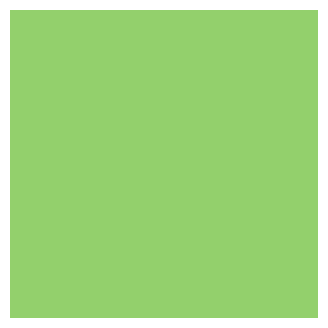

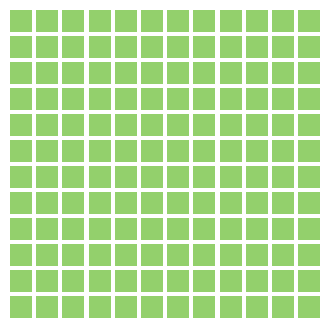

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)

#print(image)

patches = Patches(patch_size)(resized_image)
print(batch_size)
print(resized_image.shape)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [40]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [41]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    print(logits)
    # Create the Keras model.
    print(inputs.shape)
    print(logits.shape)
    model = keras.Model(inputs=inputs, outputs=logits)

    return model

In [45]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    # model.compile(
    #     optimizer = optimizer,
    #     loss = 'categorical_crossentropy',
    #     metrics=['accuracy']

    # )

    model.compile(
        optimizer=optimizer,
        # loss=keras.losses.SparseCategoricalCrossentropy(),
        # metrics=[
        #     keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        #     keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        # ],
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    model.summary()

    #callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    


    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_valid, y_valid),
        #class_weight=class_weights,
        callbacks=[checkpoint_callback],
        use_multiprocessing = True
    )

   
    return history


In [46]:
vit_classifier = create_vit_classifier()

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_39/BiasAdd:0', description="created by layer 'dense_39'")
(None, 1, 1, 3)
(None, 1)


In [47]:
history = run_experiment(vit_classifier)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1, 1, 3)]    0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 72, 72, 3)   7           ['input_3[0][0]']                
                                                                                                  
 patches_4 (Patches)            (None, None, 108)    0           ['data_augmentation[1][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 144, 64)     16192       ['patches_4[0][0]']              
                                                                                            

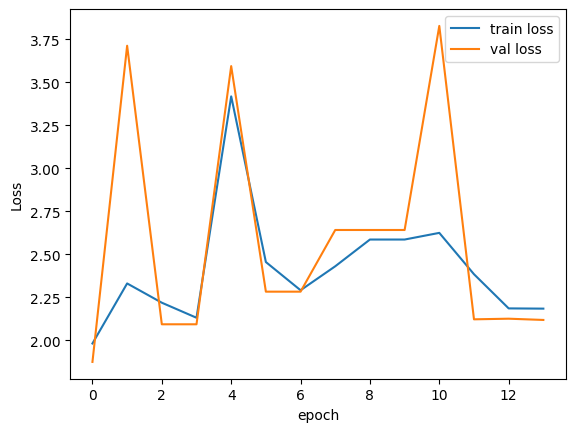

In [48]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Loss.png')

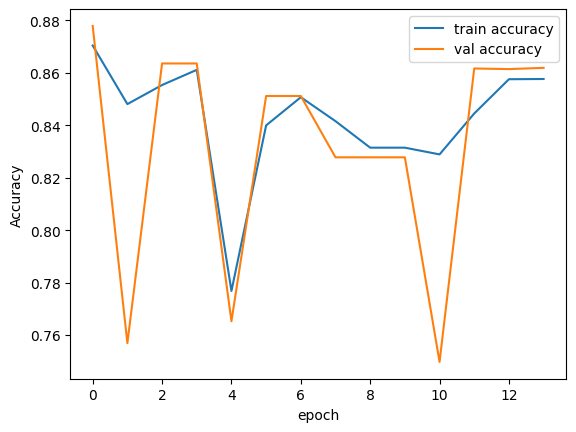

In [49]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('Accuracy.png')

In [53]:
pred_train = vit_classifier.predict(x_train, batch_size=256)


print(len(pred_train))

131/131 [==============================] - 396s 3s/step
33532


In [54]:
print(pred_train)

[[-2172.1711 ]
 [-2151.871  ]
 [-2163.9138 ]
 ...
 [-2214.1685 ]
 [  762.77856]
 [-2175.2812 ]]


In [55]:
pred_train=pred_train.round()

In [56]:
np.unique(pred_train)

array([-2316., -2308., -2304., -2303., -2302., -2300., -2299., -2298.,
       -2297., -2296., -2295., -2294., -2293., -2292., -2291., -2290.,
       -2289., -2288., -2287., -2286., -2285., -2284., -2283., -2282.,
       -2281., -2280., -2279., -2278., -2277., -2276., -2275., -2274.,
       -2273., -2272., -2271., -2270., -2269., -2268., -2267., -2266.,
       -2265., -2264., -2263., -2262., -2261., -2260., -2259., -2258.,
       -2257., -2256., -2255., -2254., -2253., -2252., -2251., -2250.,
       -2249., -2248., -2247., -2246., -2245., -2244., -2243., -2242.,
       -2241., -2240., -2239., -2238., -2237., -2236., -2235., -2234.,
       -2233., -2232., -2231., -2230., -2229., -2228., -2227., -2226.,
       -2225., -2224., -2223., -2222., -2221., -2220., -2219., -2218.,
       -2217., -2216., -2215., -2214., -2213., -2212., -2211., -2210.,
       -2209., -2208., -2207., -2206., -2205., -2204., -2203., -2202.,
       -2201., -2200., -2199., -2198., -2197., -2196., -2195., -2194.,
      

In [57]:
train_pred=[]
for i in range(len(pred_train)):
  
  if pred_train[i] > 1:
    train_pred.append(1)
  else:
    train_pred.append(0)

#print(train_pred)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, classification_report

In [60]:
pred_test = vit_classifier.predict(x_test, batch_size=256)

33/33 [==============================] - 101s 3s/step


In [61]:
test_pred=[]
for i in range(len(pred_test)):
  
  if pred_test[i] > 1:
    test_pred.append(1)
  else:
    test_pred.append(0)

#print(test_pred)

In [62]:
report = classification_report(y_test, test_pred)

In [63]:
accuracy = accuracy_score(y_test, test_pred)

precision = precision_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
#Loss = history.history['loss'][4]
#print(history.history['loss'])
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 Score", f1)
print("Recall:", recall)
report = classification_report(y_test, test_pred)
print(report)

Accuracy:  0.8598520992366412
Precision:  0.86000304116632
F1 Score 0.8598306234093245
Recall: 0.8598520992366412
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4208
           1       0.87      0.85      0.86      4176

    accuracy                           0.86      8384
   macro avg       0.86      0.86      0.86      8384
weighted avg       0.86      0.86      0.86      8384



In [64]:
import seaborn as sns

[[3665  543]
 [ 632 3544]]


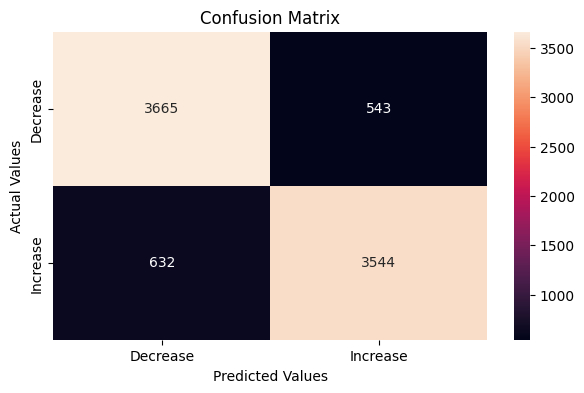

<Figure size 640x480 with 0 Axes>

In [66]:
cm = confusion_matrix(y_test, test_pred)
print(cm)
    
    
cm_df = pd.DataFrame(cm,
                     index = ['Decrease','Increase'], 
                     columns = ['Decrease','Increase'])
    #Plotting the confusion matrix
plt.figure(figsize=(7,4))
sns.heatmap(cm_df, annot=True, fmt ='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig('Confusion.png')

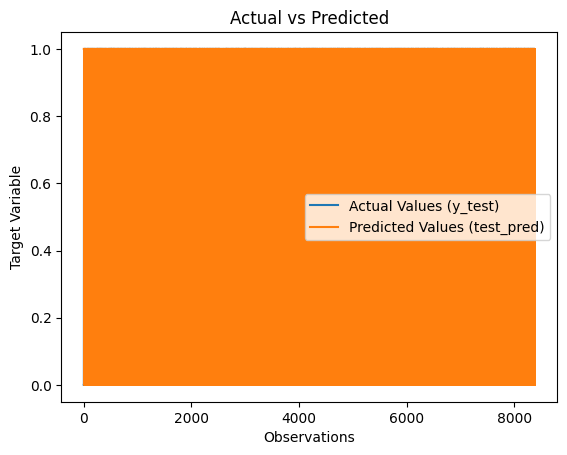

In [67]:
plt.plot(y_test, label='Actual Values (y_test)')
plt.plot(test_pred, label='Predicted Values (test_pred)')
plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

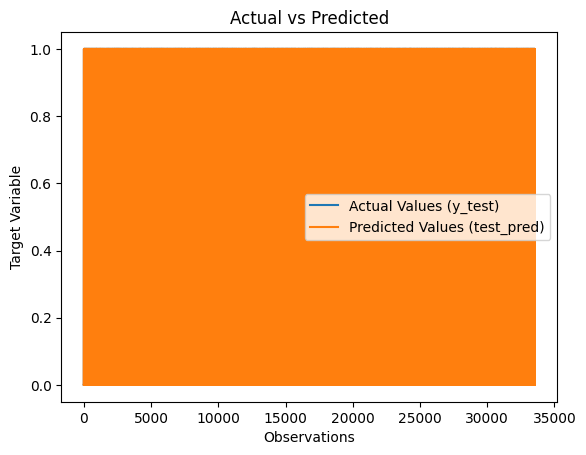

In [68]:
plt.plot(y_train, label='Actual Values (y_train)')
plt.plot(train_pred, label='Predicted Values (train_pred)')
plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()